<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/wilmanski/Zaj%C4%99cia2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import math
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from termcolor import colored

In [96]:
#zaczytaj dane z pliku csv
df_train = pd.read_csv("train.csv", sep = "," , encoding= 'utf-8')
#sprawdź liczbę kolumn i wierszy
df_train.shape
df_train.info()
#wyświetl część tabeli
df_train.head()
#usuń wiersze z duplikatami id
df_train.drop_duplicates(subset="ID", inplace=True)

<ipython-input-96-cb3e3c6e735d>:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv("train.csv", sep = "," , encoding= 'utf-8')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

0x1602     1
0x13701    1
0x1374d    1
0x1374c    1
0x1374b    1
          ..
0xa6a2     1
0xa6a1     1
0xa6a0     1
0xa69f     1
0x1c7e8    1
Name: ID, Length: 74055, dtype: int64
CUS_0xd40     8
CUS_0x1c9c    8
CUS_0xc6c3    8
CUS_0xba2a    8
CUS_0xb61a    8
             ..
CUS_0xb340    8
CUS_0xa1f1    8
CUS_0xbe49    8
CUS_0x2a8c    8
CUS_0x4ac2    7
Name: Customer_ID, Length: 9257, dtype: int64
January     9257
February    9257
March       9257
April       9257
May         9257
June        9257
July        9257
August      9256
Name: Month, dtype: int64
Raymondr            38
Langep              37
Nate Raymondw       37
Jonesb              36
Valetkevitchv       34
                    ..
Yinka Adegokec       4
Piersong             4
Josephine Masonz     4
Gahagand             4
Ross Kerberb         3
Name: Name, Length: 7883, dtype: int64
26      2149
25      2137
32      2118
31      2087
28      2076
        ... 
5479       1
6925       1
3581       1
890        1
8587       1


<Axes: xlabel='count', ylabel='Credit_Score'>

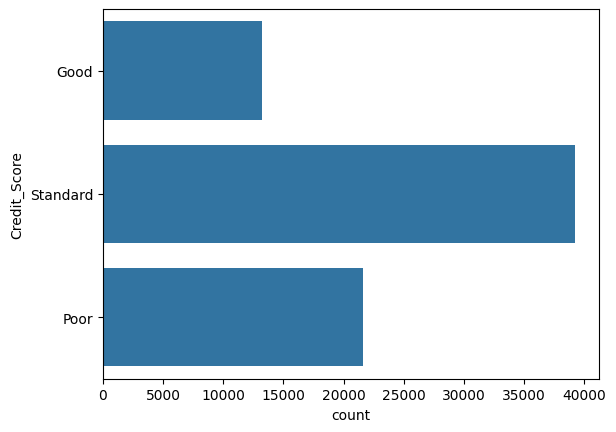

In [22]:
#opisz statystyki danych
df_train.describe()
#zlicz różne wartości danych
for i in df_train.columns:
  print(df_train[i].value_counts())
print('*'*50)
# pokaż liczności danych kategorycznych
sns.countplot(df_train['Credit_Score'])
#zastąp błędne dane

In [23]:
df_train.info()
#zmień dane na numeryczne
FeaturesToConvert = ['Age','Annual_Income','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit','Outstanding_Debt','Amount_invested_monthly','Monthly_Balance']
# ale najpierw sprawdź czy nie ma błędów w danych
for feature in FeaturesToConvert:
  uniques = df_train[feature].unique()
  print('Feature:','\n', colored(feature, attrs =['bold']), '\n', uniques,'\n','--'*40,'\n')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74055 entries, 0 to 74054
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        74055 non-null  object 
 1   Customer_ID               74055 non-null  object 
 2   Month                     74055 non-null  object 
 3   Name                      66672 non-null  object 
 4   Age                       74055 non-null  object 
 5   SSN                       74055 non-null  object 
 6   Occupation                74055 non-null  object 
 7   Annual_Income             74055 non-null  object 
 8   Monthly_Inhand_Salary     62980 non-null  float64
 9   Num_Bank_Accounts         74055 non-null  int64  
 10  Num_Credit_Card           74055 non-null  int64  
 11  Interest_Rate             74055 non-null  int64  
 12  Num_of_Loan               74055 non-null  object 
 13  Type_of_Loan              65695 non-null  object 
 14  Delay_

In [25]:
# usuń zbędne znaki '-’ , '_'
for feature in FeaturesToConvert:
  df_train[feature] = df_train[feature].replace('-', '', regex=True).replace('_','', regex=True)
# puste kolumny zastąp NAN
for feature in FeaturesToConvert:
  df_train[feature] = df_train[feature].replace({'':np.nan})
# zmien typ zmiennych ilościowych
for feature in FeaturesToConvert:
  df_train[feature] = df_train[feature].astype('float64')

In [26]:
#uzupełnij braki średnią
df_train['Monthly_Inhand_Salary'] = df_train['Monthly_Inhand_Salary'].fillna(method='pad')

In [27]:
average_age = df_train['Age'].mean()
print(average_age)

119.12107217608535


In [28]:
common_month = df_train['Month'].mode()
print(common_month)

0       April
1    February
2     January
3        July
4        June
5       March
6         May
Name: Month, dtype: object


In [29]:
from sklearn.preprocessing import LabelEncoder
# stwórz obiekt enkodera
le = LabelEncoder()
df_train.Occupation = le.fit_transform(df_train.Occupation)
# sprawdź transformacje
df_train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,12,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,12,19114.12,1824.843333,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,500.0,821-00-0265,12,19114.12,1824.843333,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,12,19114.12,1824.843333,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,12,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


In [31]:
df_train['Credit_History_Age'].head()

0    22 Years and 1 Months
1                      NaN
2    22 Years and 3 Months
3    22 Years and 4 Months
4    22 Years and 5 Months
Name: Credit_History_Age, dtype: object

In [84]:
df_test = df_train['Credit_History_Age'].str.split(pat=None, n=0, expand=False, regex=None)
new_df_test = df_test.fillna(0)
print(new_df_test)

0         [22, Years, and, 1, Months]
1                                   0
2         [22, Years, and, 3, Months]
3         [22, Years, and, 4, Months]
4         [22, Years, and, 5, Months]
                     ...             
74050     [12, Years, and, 7, Months]
74051     [12, Years, and, 8, Months]
74052     [12, Years, and, 9, Months]
74053    [12, Years, and, 10, Months]
74054                               0
Name: Credit_History_Age, Length: 74055, dtype: object


In [85]:
for i in range(len(df_test)):
  if new_df_test[i] != 0:
    years = new_df_test[i][0]
    months = new_df_test[i][3]
    total_months = int(years) * 12 + int(months)
    new_df_test[i] = total_months


In [86]:
print(new_df_test)

0        265
1          0
2        267
3        268
4        269
        ... 
74050    151
74051    152
74052    153
74053    154
74054      0
Name: Credit_History_Age, Length: 74055, dtype: object


<ipython-input-87-46881b1ac11e>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_train.corr()


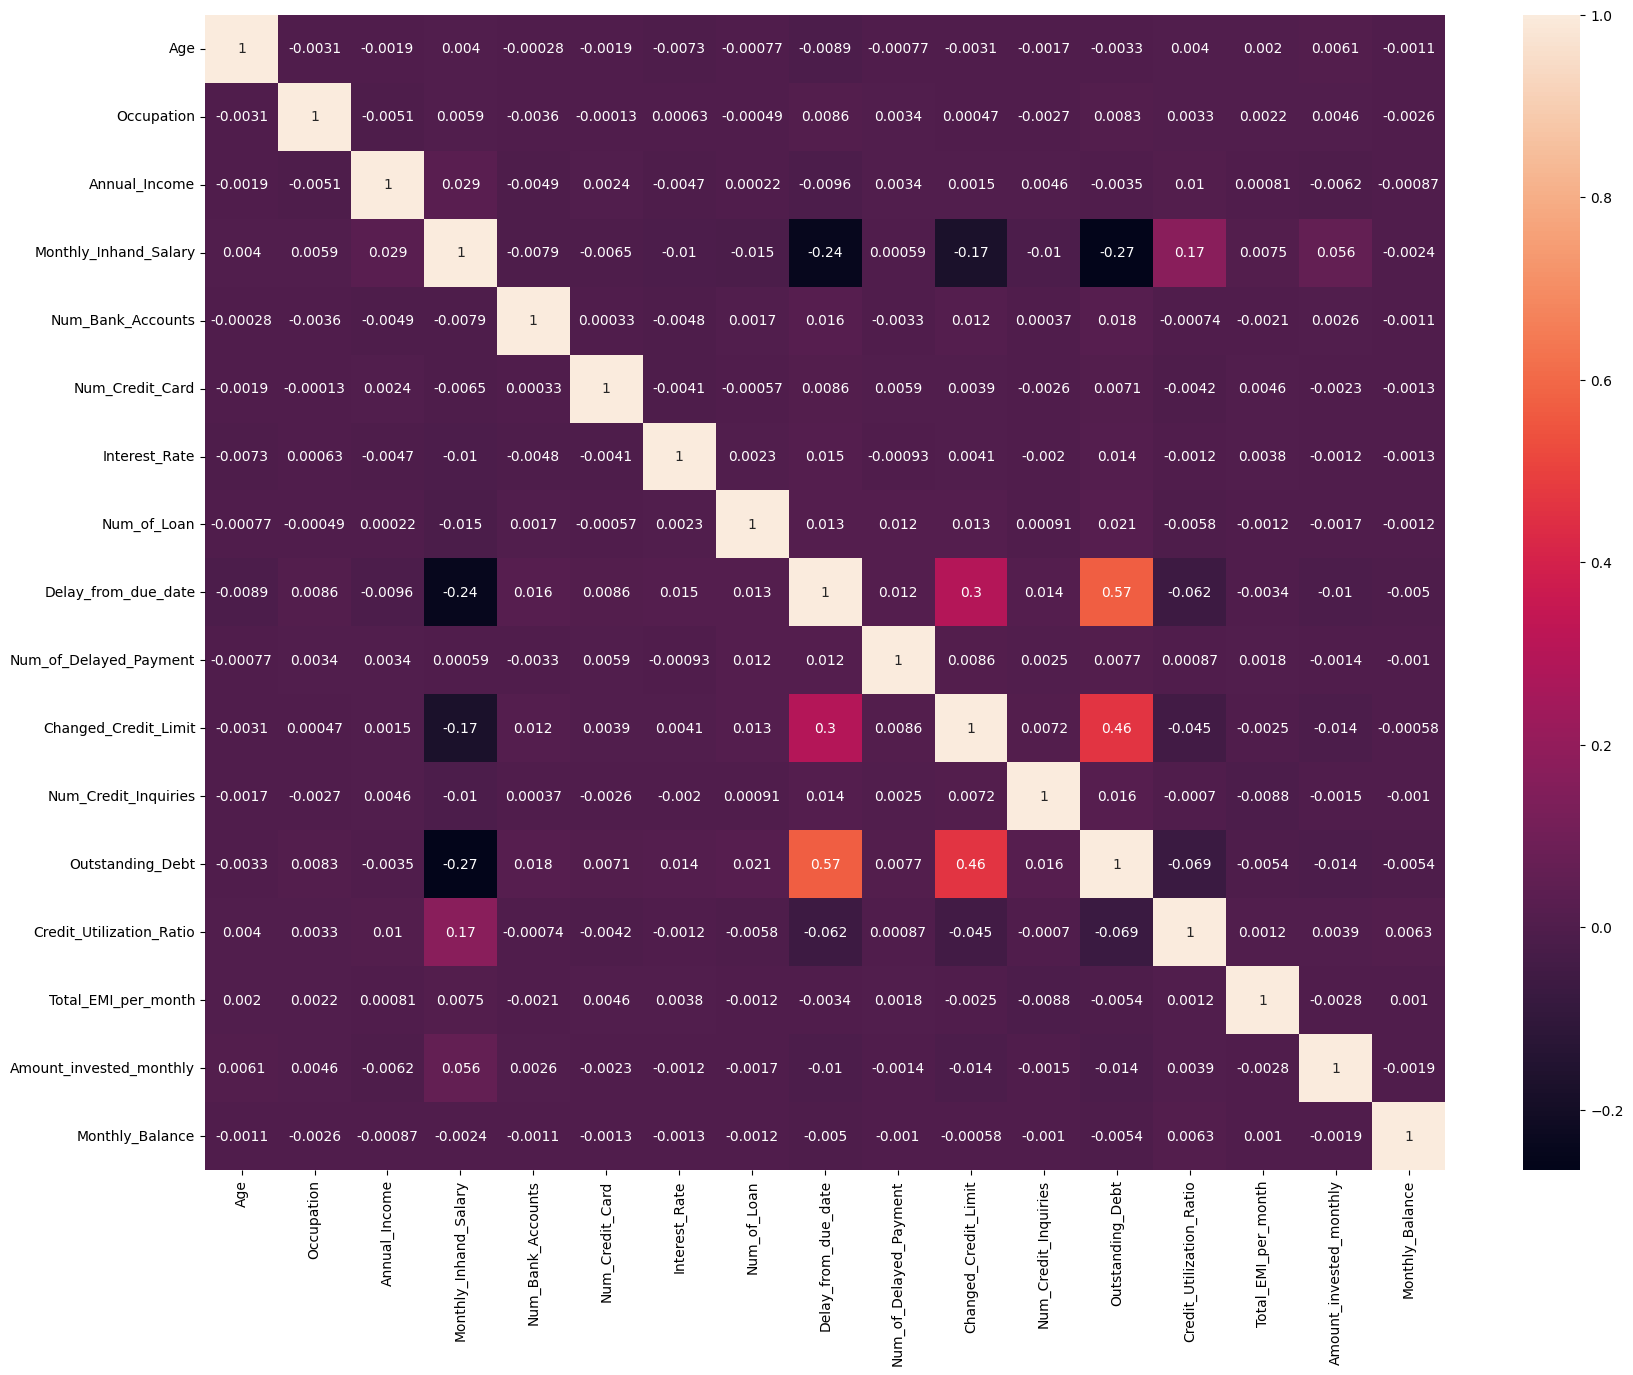

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df_train.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [98]:
# Drop outlier by IQR calculation
for col in df_train.columns:
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df_train.drop(df_train.loc[df_train[col] > (Q3 + 1.5 *
    IQR)].index)
    df = df_train.drop(df_train.loc[df_train[col] < (Q1 - 1.5 *
    IQR)].index)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [90]:
df.describe()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,74055.000000,74055.000000,7.405500e+04,74055.000000,74055.000000,74055.000000,74055.000000,74055.000000,74055.00000,68907.000000,72511.000000,72646.000000,74054.000000,74054.000000,74054.000000,70742.000000,7.316500e+04
mean,119.121072,7.520343,1.769539e+05,4189.958179,17.234582,22.778232,71.882641,10.818405,21.10823,29.988245,10.448921,27.394984,1428.277544,32.302657,1404.102313,634.656586,2.733547e+22
std,682.700424,4.645622,1.436278e+06,3185.542948,118.488031,130.589737,463.050403,62.215845,14.85660,218.235968,6.686491,190.081177,1158.928882,5.116413,8324.712895,2037.834462,3.018477e+24
min,14.000000,0.000000,7.005930e+03,319.556250,-1.000000,0.000000,1.000000,0.000000,-5.00000,0.000000,0.000000,0.000000,0.540000,20.000000,0.000000,0.000000,7.759665e-03
25%,25.000000,3.000000,1.937048e+04,1625.165833,3.000000,4.000000,8.000000,2.000000,10.00000,9.000000,5.290000,3.000000,565.040000,28.066602,30.707565,74.379111,2.702073e+02
50%,33.000000,7.000000,3.746718e+04,3076.148333,6.000000,6.000000,14.000000,3.000000,18.00000,14.000000,9.370000,6.000000,1164.470000,32.344149,69.432573,135.762808,3.367110e+02
75%,42.000000,12.000000,7.252420e+04,5940.405417,7.000000,7.000000,20.000000,6.000000,28.00000,18.000000,14.900000,9.000000,1952.970000,36.507957,161.474397,265.228311,4.695639e+02
max,8698.000000,15.000000,2.419806e+07,15204.633333,1798.000000,1499.000000,5797.000000,1495.000000,67.00000,4397.000000,36.970000,2597.000000,4998.070000,50.000000,82256.000000,10000.000000,3.333333e+26


In [89]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,12,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,12,19114.12,1824.843333,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,500.0,821-00-0265,12,19114.12,1824.843333,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,12,19114.12,1824.843333,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,12,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
